In [1]:
from langchain_openai import ChatOpenAI

In [8]:
#define all the tools we want to use

def multiply(a: int, b: int) -> int:
    """Multiply a and b.
    
    Args:
        a: first int
        b: second int
    """
    return a * b


def add(a: int, b: int) -> int:
    """Adds a and b.
    
    Args:
        a: first int
        b: second int
    """
    return a + b

def divide(a: int, b: int) -> float:
    """divide a and b.
    
    Args:
        a: first int
        b: second int
    """
    return a / b

tools = [multiply, add, divide]

llm = ChatOpenAI(model="gpt-4o")
llm_with_tools = llm.bind_tools(tools)

In [13]:
from langgraph.graph import MessagesState, StateGraph, END
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage
from langgraph.prebuilt import ToolNode, tools_condition
from IPython.display import display, Image



def assistant(state: MessagesState):

    sys_msg = SystemMessage(content = "You are a helpful assistant tasked with performing arithmetic operations on the set of inputs.")

    return {
        "messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]
    }

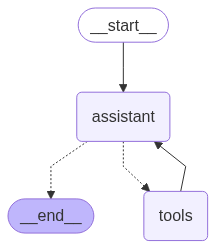

In [14]:
graph = StateGraph(MessagesState)
graph.add_node("assistant", assistant)
graph.add_node("tools", ToolNode(tools))

graph.set_entry_point("assistant")
graph.add_conditional_edges(
    "assistant",
    tools_condition
)

graph.add_edge("tools","assistant")

basic_graph = graph.compile()

display(Image(basic_graph.get_graph(xray=True).draw_mermaid_png()))

In [15]:
messages = HumanMessage(content="Add 3 and 4. Multiply the ouput by 2. Divide the output by 5.")
messages = basic_graph.invoke({"messages":messages})

In [16]:
messages

{'messages': [HumanMessage(content='Add 3 and 4. Multiply the ouput by 2. Divide the output by 5.', additional_kwargs={}, response_metadata={}, id='c208d2ed-a18e-4cf9-8e5a-b10d0a025d6b'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_3Wun5PV5mpMaDSR6YbsDi8dd', 'function': {'arguments': '{"a":3,"b":4}', 'name': 'add'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 148, 'total_tokens': 165, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-BjzGrocPrSWPCxz0wvFq27Iyi7eTN', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--6cab8872-4d85-4bab-b2e6-e68a7b42fbfb-0', tool_calls=[{'name': 'add', 'args': {'a': 3, 'b': 4}, 'id